In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import namedtuple, defaultdict

In [4]:
l = !ls ../output/200-4/
l = list(map(lambda x: "../output/200-4/" + x,l))
ls = list(map(lambda x: pd.read_csv(x), l))

In [5]:
Stats = namedtuple('Stats', ['initialw', 'costw', 'num_anonymity', 'mean_min', 'max_mean', 'median_min', 'max_median'])
stats = defaultdict(lambda: defaultdict(lambda: None))
for df in ls:
    iw, costw, an, meann, meanm, mediann, medianm = df.mean()
    stats[costw][iw] = {'initial_w':iw,'none-anonymity': an,'mean-min': meann,'max-mean': meanm,'median-mean': mediann,'max-median': medianm}
stats[2][200]

{'initial_w': 200.0,
 'none-anonymity': 0.03015075376884422,
 'mean-min': 5.573800833937141,
 'max-mean': 12.763573614618211,
 'median-mean': 4.64474463280996,
 'max-median': 13.692629815745391}

TypeError: no numeric data to plot

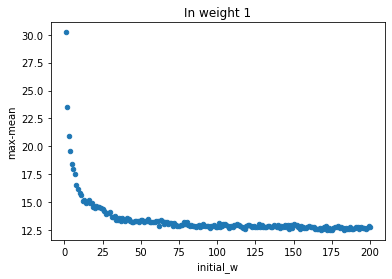

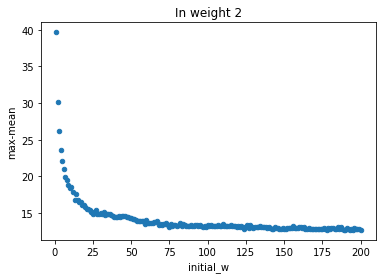

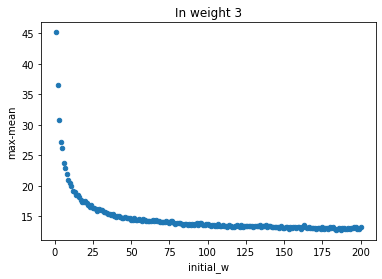

In [6]:
columns = stats[2][200].keys()
data = {}
for cw in range(1,4+1):
    dat = defaultdict(lambda: [])
    for s in stats[cw].values():
        for c in columns:
            dat[c].append(s[c])
    data[cw] = dat
dfs = {}

for cw in range(1, 4+1):
    dfs[cw] = pd.DataFrame(data=data[cw])

for i, df in dfs.items():
    df.plot.scatter(x='initial_w',y= 'max-mean', title=f'In weight {i}')

In [21]:
df1 = dfs[1]
select = df1.loc[lambda x: x['initial_w'] >= 5].loc[lambda x: x['initial_w'] <=35]
select

,initial_w,none-anonymity,mean-min,max-mean,median-mean,max-median
2,10.0,0.000000,8.728121,23.543303,7.020671,25.250754
13,11.0,0.010050,8.743536,23.444187,7.115278,25.072446
25,12.0,0.005025,8.774900,22.817496,7.157722,24.434673
36,13.0,0.010050,8.808224,22.030668,7.255140,23.583752
47,14.0,0.000000,8.811068,22.133581,7.264582,23.680067
58,15.0,0.005025,8.817481,22.238572,7.320710,23.735343
69,16.0,0.000000,8.835053,22.034611,7.293869,23.575796
80,17.0,0.000000,8.878807,21.688023,7.413145,23.153685
91,18.0,0.000000,8.902310,21.463529,7.411485,22.954355
102,19.0,0.000000,8.885544,21.482967,7.389450,22.979062


In [24]:
df1.loc[lambda x: x['none-anonymity'] != 0.0]

,initial_w,none-anonymity,mean-min,max-mean,median-mean,max-median
13,11.0,0.010050,8.743536,23.444187,7.115278,25.072446
22,1.0,4.804020,8.574300,51.099702,5.107466,54.566536
25,12.0,0.005025,8.774900,22.817496,7.157722,24.434673
36,13.0,0.010050,8.808224,22.030668,7.255140,23.583752
58,15.0,0.005025,8.817481,22.238572,7.320710,23.735343
114,2.0,1.140704,8.716938,40.044370,5.920762,42.840546
115,22.0,0.010050,8.949760,21.278350,7.507842,22.720268
125,3.0,0.467337,8.721521,34.167743,6.184458,36.704806
136,4.0,0.160804,8.643883,30.964988,6.433661,33.175209
147,5.0,0.120603,8.674544,28.958581,6.511182,31.121943
